In [1]:
!git clone https://github.com/dolong2110/Cifar100-Classification.git

Cloning into 'Cifar100-Classification'...
remote: Enumerating objects: 536, done.
remote: Counting objects: 100% (536/536), done.
remote: Compressing objects: 100% (389/389), done.
remote: Total 536 (delta 290), reused 365 (delta 140), pack-reused 0
Receiving objects: 100% (536/536), 121.17 KiB | 2.38 MiB/s, done.
Resolving deltas: 100% (290/290), done.


In [2]:
%cd Cifar100-Classification/

/content/Cifar100-Classification


In [3]:
!pip install -r requirements.txt

     |████████████████████████████████| 120 kB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for docstring-parser: filename=docstring_parser-0.13-py3-none-any.whl size=31865 sha256=a49241a836dfb5412c0a4b9b751d1c88af877a1509a4a7a56f1bf8ffe66685a4
  Stored in directory: /root/.cache/pip/wheels/bd/88/3c/d1aa049309f7945178cac9fbe6561a86424f432da57c18ca0f
Successfully built docstring-parser


In [4]:
import torch
 
torch.cuda.empty_cache()

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
!python3 train.py --model resnet18 --augmentation True

169001984it [00:02, 64346618.69it/s]                   
Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified
Files already downloaded and verified
Epoch [0], last_lr: 0.00000, train_loss: 3.7204, val_loss: 3.3731, val_acc: 0.1987


In [8]:
data_test = torch.load('data_test.th')
model = torch.load('model.th')

In [9]:
data_test 

Dataset CIFAR100
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5070751592371323, 0.48654887331495095, 0.4409178433670343), std=(0.2673342858792401, 0.2564384629170883, 0.27615047132568404))
           )

In [20]:
def to_device(data, device):
  """Move tensor(s) to chosen device"""
  if isinstance(data, (list,tuple)):
      return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return data_test.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: lion , Predicted: elephant


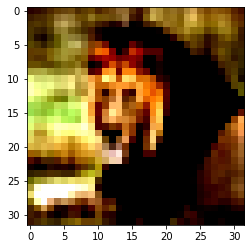

In [21]:
# Log 1 case
import matplotlib.pyplot as plt

img, label = data_test[117][0], data_test[117][1]
plt.imshow(img.permute(1, 2, 0))
print('Label:', data_test.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


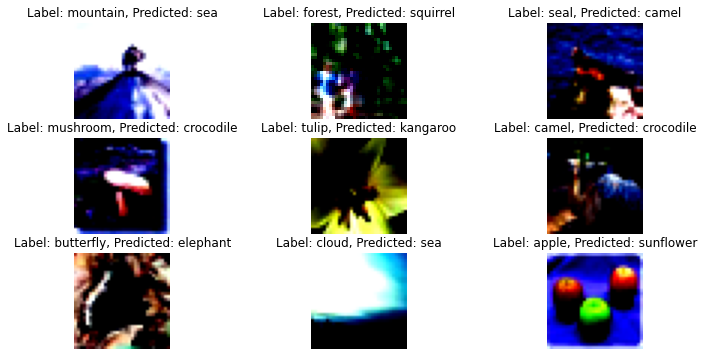

In [36]:
# Analyze 9 fail cases
plt.figure(figsize = (12, 6))

idx = 0
for _ in data_test:
    img, label = _[0], _[1]
    label_predict = predict_image(img, model)
    label_truth = data_test.classes[label]
    if label_truth != label_predict:
        idx += 1
        plt.subplot(3, 3, idx)
        plt.title(f'Label: {data_test.classes[label]}, Predicted: {predict_image(img, model)}')
        plt.imshow(img.permute(1, 2, 0))
        plt.axis('off')

    if idx >= 9:
      break

plt.show()